In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm

# the below extension properly formats a cell after it is run
%load_ext nb_black
pd.set_option("display.max_columns", 800)

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)


# Set the maximum number of columns to 200
pd.set_option("display.max_columns", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [30]:
housing = pd.read_csv("../data/housing_no_na.csv", index_col=0)
housing

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909176150,856,126000,30,RL,-1.0,7890,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,No_Pool,No_Fence,None,0,3,2010,WD,Normal
905476230,1049,139500,120,RL,42.0,4235,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,No_Pool,No_Fence,None,0,2,2009,WD,Normal
911128020,1001,124900,30,C (all),60.0,6060,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,No_Pool,No_Fence,None,0,11,2007,WD,Normal
535377150,1039,114000,70,RL,80.0,8146,Pave,No_Alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,No_Fireplace,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,No_Pool,No_Fence,None,0,5,2009,WD,Normal
534177230,1665,227000,60,RL,70.0,8400,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,No_Fireplace,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,No_Pool,No_Fence,None,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903205040,952,121000,30,RL,-1.0,8854,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,No_Pool,No_Fence,None,0,5,2009,WD,Normal
905402060,1733,139600,20,RL,-1.0,13680,Pave,No_Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,No_Bsmt,No_Bsmt,No_Bsmt,No_Bsmt,0.0,No_Bsmt,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,None,0,6,2009,WD,Normal
909275030,2002,145000,90,RH,82.0,6270,Pave,No_Alley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,T

<IPython.core.display.Javascript object>

In [55]:
housing_no_na = pd.read_csv("data/housing_no_na.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/housing_no_na.csv'

<IPython.core.display.Javascript object>

In [56]:
locations = pd.read_csv("../data/locations.csv")
locations
# Use the loc accessor to filter the dataframe on the PID column
locations



,Unnamed: 0,PID,SalePrice,Neighborhood,Prop_Addr,latitude,longitude
0,0,909176150,126000,SWISU,"436 HAYWARD AVE, AMES, USA",42.018564,-93.651619
1,1,905476230,139500,Edwards,"3416 WEST ST, AMES, USA",42.024855,-93.663671
2,2,905476230,139500,Edwards,"3416 WEST ST, AMES, USA",42.024855,-93.663671
3,3,911128020,124900,IDOTRR,"320 S 2ND ST, AMES, USA",42.021548,-93.614068
4,4,535377150,114000,OldTown,"1524 DOUGLAS AVE, AMES, USA",42.037391,-93.612207
...,...,...,...,...,...,...,...
2599,2599,903205040,121000,BrkSide,"1021 RIDGEWOOD AVE, AMES, USA",42.032102,-93.626373
2600,2600,905402060,139600,Edwards,"3619 MARY CIR, AMES, USA",42.027669,-93.666138
2601,2601,909275030,145000,Crawfor,"2140 SUNSET DR 2142, AMES, USA",42.020129,-93.643832
2602,2602,907192040,217500,CollgCr,"5319 CLEMENS BLVD, AMES, USA",42.016802,-93.689748


<IPython.core.display.Javascript object>

In [34]:
cols_to_check = [col for col in housing.columns if "Gara" in col]

# Filter the dataframe to only include rows where GarageYrBlt is -1
filtered_housing = housing[housing["GarageYrBlt"] == -1]

# Use value_counts() to count the values for each column in the filtered dataframe
for col in cols_to_check:
    print(filtered_housing[col].value_counts())

No_Garage    127
Detchd         2
Name: GarageType, dtype: int64
-1.0    129
Name: GarageYrBlt, dtype: int64
No_Garage    129
Name: GarageFinish, dtype: int64
0.0    128
1.0      1
Name: GarageCars, dtype: int64
0.0      128
360.0      1
Name: GarageArea, dtype: int64
No_Garage    129
Name: GarageQual, dtype: int64
No_Garage    129
Name: GarageCond, dtype: int64


<IPython.core.display.Javascript object>

In [41]:
filtered_housing.sort_values(by='GarageCars', ascending=False)



,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
903426160,1984,160000,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,0.0,0.0,2,0,5,1,TA,8,Typ,0,No_Fireplace,Detchd,-1.0,No_Garage,1.0,360.0,No_Garage,No_Garage,Y,64,0,180,0,0,0,No_Pool,MnPrv,Shed,1000,9,2008,WD,Normal
909101060,864,67000,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,41.0,Unf,0.0,823.0,864.0,GasA,TA,N,FuseF,864,0,0,1.0,0.0,1,0,2,1,TA,5,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,N,0,0,100,0,0,0,No_Pool,No_Fence,None,0,9,2008,WD,Normal
903225050,784,109500,45,RM,50.0,6130,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,5,6,1924,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,784.0,Unf,0.0,0.0,784.0,GasA,Gd,Y,SBrkr,784,0,0,1.0,0.0,1,0,2,1,Gd,5,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,Y,0,0,116,0,0,0,No_Pool,No_Fence,None,0,5,2008,WD,Normal
903456090,754,84500,190,RM,60.0,6780,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490.0,Unf,0.0,30.0,520.0,GasA,Gd,N,SBrkr,520,0,234,1.0,0.0,1,0,2,1,TA,5,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,N,53,0,0,0,0,0,No_Pool,No_Fence,None,0,6,2006,WD,Normal
535376010,882,103200,45,RL,55.0,5500,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Unf,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,882.0,882.0,GasA,Ex,Y,SBrkr,882,0,0,0.0,0.0,1,0,1,1,TA,4,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,Y,0,0,0,0,0,0,No_Pool,MnPrv,None,0,4,2007,WD,Normal
903476090,1864,97500,190,RM,41.0,5852,Pave,No_Alley,IR3,Bnk,AllPub,Corner,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,5,1902,2000,Gable,CompShg,MetalSd,MetalSd,Stone,188.0,TA,Fa,BrkTil,TA,Fa,No,Rec,169.0,Unf,0.0,851.0,1020.0,GasA,TA,N,FuseF,978,886,0,0.0,0.0,2,1,6,1,TA,9,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,N,0,188,102,0,0,0,No_Pool,No_Fence,None,0,5,2009,WD,Normal
909250030,1666,100000,50,RL,51.0,9839,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,2,1931,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,Fa,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,Ex,Y,SBrkr,894,772,0,1.0,0.0,1,0,3,1,TA,7,Typ,1,Gd,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,N,0,156,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal
923228420,630,81000,180,RM,21.0,1890,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,7,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,Gd,TA,Av,ALQ,495.0,Unf,0.0,135.0,630.0,GasA,Gd,Y,SBrkr,630,0,0,1.0,0.0,1,0,1,1,TA,3,Typ,0,No_Fireplace,No_Garage,-1.0,No_Garage,0.0,0.0,No_Garage,No_Garage,Y,88,0,0,0,0,0,No_Pool,No_Fence,None,0,6,20

<IPython.core.display.Javascript object>

In [42]:
print(housing["SaleType"].value_counts())
print(housing["SaleCondition"].value_counts())


WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64
Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64


<IPython.core.display.Javascript object>

In [43]:
# Filter the DataFrame to only include rows where SaleType is "Family"
family_sales = housing[housing["SaleType"] == "Family"]

# Print the mean, median, and standard deviation of SalePrice in the filtered DataFrame
print("SalePrice statistics for Family sales:")
print("Mean: ", family_sales["SalePrice"].mean())
print("Median: ", family_sales["SalePrice"].median())
print("Standard deviation: ", family_sales["SalePrice"].std())

# Print the mean, median, and standard deviation of SalePrice in the entire dataset
print("\nSalePrice statistics for all sales:")
print("Mean: ", housing["SalePrice"].mean())
print("Median: ", housing["SalePrice"].median())
print("Standard deviation: ", housing["SalePrice"].std())


SalePrice statistics for Family sales:
Mean:  nan
Median:  nan
Standard deviation:  nan

SalePrice statistics for all sales:
Mean:  178059.62325581396
Median:  159900.0
Standard deviation:  75031.08937358031


<IPython.core.display.Javascript object>

In [47]:
print(housing[housing["SalePrice"].isna()])


Empty DataFrame
Columns: [GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []


<IPython.core.display.Javascript object>

In [38]:
housing[housing["GarageCars"] == 360.0]

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

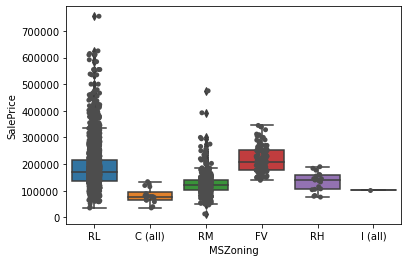

<IPython.core.display.Javascript object>

In [12]:
# Filter the data to include only the relevant columns
housing_3_col = housing[["MSZoning", "Neighborhood", "SalePrice"]]

# Visualize the relationship between MSZoning and SalePrice
sns.boxplot(x="MSZoning", y="SalePrice", data=housing_3_col)
sns.stripplot(x="MSZoning", y="SalePrice", data=housing_3_col, color=".3")



<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

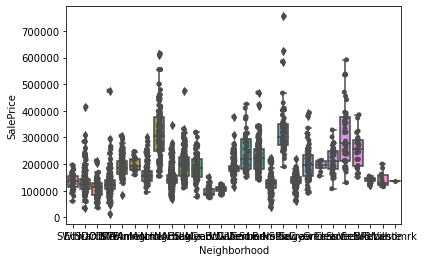

<IPython.core.display.Javascript object>

In [13]:
# Visualize the relationship between Neighborhood and SalePrice
sns.boxplot(x="Neighborhood", y="SalePrice", data=housing_3_col)
sns.stripplot(x="Neighborhood", y="SalePrice", data=housing_3_col, color=".3")

<AxesSubplot:xlabel='Neighborhood', ylabel='MSZoning'>

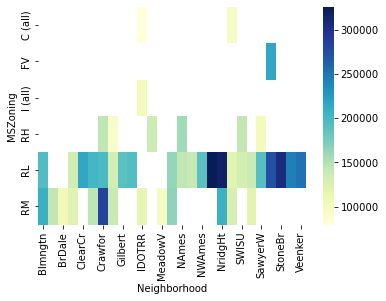

<IPython.core.display.Javascript object>

In [14]:
# Create a pivot table to summarize the average SalePrice by MSZoning and Neighborhood
table = pd.pivot_table(
    housing_3_col,
    values="SalePrice",
    index="MSZoning",
    columns="Neighborhood",
    aggfunc="mean",
)

# Use a heatmap to visualize the pivot table
sns.heatmap(table, cmap="YlGnBu")

In [15]:
pip install folium


     |████████████████████████████████| 102 kB 5.4 MB/s ta 0:00:011


ERROR:root:Cannot parse: 1:4: pip install folium
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.9/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.9/site-packages/black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.9/site-packages/black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install folium


Note: you may need to restart the kernel to use updated packages.


In [19]:
import folium

# create a map centered on the median latitude and longitude of the housing data
map_center = [housing['latitude'].median(), housing['longitude'].median()]
m = folium.Map(location=map_center, zoom_start=10)

# add a marker for each house, with the sale price displayed as a tooltip
for index, row in housing.iterrows():
    tooltip = f"${row['SalePrice']:,}"
    folium.Marker(location=[row['latitude'], row['longitude']], tooltip=tooltip).add_to(m)

# display the map
m


ValueError: Location values cannot contain NaNs.

<IPython.core.display.Javascript object>

In [21]:
# Looking at the NA's again
null_stats = (
    housing.isnull()
    .sum()
    .pipe(lambda x: pd.DataFrame({"missing_value_count": x}))
    .assign(
        percent_of_dataset=lambda x: np.round(
            x["missing_value_count"] / housing.shape[0] * 100, 2
        )
    )
    .query("missing_value_count > 0")
    .sort_values(by="missing_value_count", ascending=False)
)
print(null_stats)

              missing_value_count  percent_of_dataset
PoolQC                       2595               99.65
MiscFeature                  2506               96.24
Alley                        2434               93.47
Fence                        2075               79.69
FireplaceQu                  1262               48.46
LotFrontage                   463               17.78
GarageCond                    130                4.99
GarageQual                    130                4.99
GarageFinish                  130                4.99
GarageYrBlt                   130                4.99
GarageType                    128                4.92
BsmtExposure                   67                2.57
BsmtFinType2                   66                2.53
BsmtCond                       65                2.50
BsmtFinType1                   65                2.50
BsmtQual                       65                2.50
latitude                       48                1.84
longitude                   

<IPython.core.display.Javascript object>

In [4]:
housing = pd.read_csv("../data/housing_lat_lon.csv", index_col=0)
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr,latitude,longitude
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,"436 HAYWARD AVE, Ames, USA",42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,"3416 WEST ST, Ames, USA",42.024855,-93.663671
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,"3416 WEST ST, Ames, USA",42.024855,-93.663671
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,"320 S 2ND ST, Ames, USA",42.021548,-93.614068
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,"1524 DOUGLAS AVE, Ames, USA",42.037391,-93.612207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal,"1021 RIDGEWOOD AVE, Ames, USA",42.032102,-93.626373
2600,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,"3619 MARY CIR, Ames, USA",42.027669

<IPython.core.display.Javascript object>

In [5]:



sales = pd.DataFrame({
    'Date': housing['MoSold'].astype(str) + '-' + housing['YrSold'].astype(str),
    'SalePrice': housing['SalePrice'],
    'TotalSF': housing['GrLivArea'] + housing['TotalBsmtSF']
})


<IPython.core.display.Javascript object>

In [6]:
sales

,Date,SalePrice,TotalSF
0,3-2010,126000,1712.0
1,2-2009,139500,2098.0
2,2-2009,139500,2098.0
3,11-2007,124900,1838.0
4,5-2009,114000,1444.0
...,...,...,...
2599,5-2009,121000,1904.0
2600,6-2009,139600,1733.0
2601,8-2007,145000,3003.0
2602,7-2007,217500,2827.0


<IPython.core.display.Javascript object>

In [7]:
# calculate price per square foot
sales['PricePerSF'] = sales['SalePrice'] / sales['TotalSF']

# group by year and calculate average price per square foot for each year
yearly_avg_ppsf = sales.groupby('Date')['PricePerSF'].mean()

# calculate percentage change in average price per square foot from the previous year
pct_change_ppsf = yearly_avg_ppsf.pct_change()

print(pct_change_ppsf)


Date
1-2006          NaN
1-2007     0.073860
1-2008    -0.055408
1-2009     0.086399
1-2010    -0.030927
10-2006   -0.111088
10-2007    0.161515
10-2008   -0.079370
10-2009    0.016534
11-2006   -0.000018
11-2007   -0.043911
11-2008   -0.010226
11-2009    0.040516
12-2006    0.029891
12-2007    0.057299
12-2008   -0.061765
12-2009   -0.096211
2-2006     0.113535
2-2007    -0.085960
2-2008     0.160041
2-2009    -0.093028
2-2010     0.019290
3-2006    -0.012171
3-2007     0.008494
3-2008    -0.003441
3-2009     0.020525
3-2010    -0.041447
4-2006    -0.005590
4-2007    -0.012590
4-2008     0.052234
4-2009     0.036844
4-2010     0.006285
5-2006    -0.060075
5-2007     0.035338
5-2008     0.007022
5-2009    -0.001699
5-2010    -0.038336
6-2006     0.046576
6-2007    -0.002802
6-2008    -0.010446
6-2009     0.010585
6-2010    -0.032808
7-2006     0.038657
7-2007    -0.000932
7-2008    -0.012237
7-2009     0.050636
7-2010    -0.169691
8-2006     0.174071
8-2007    -0.019028
8-2008     0.00

<IPython.core.display.Javascript object>

In [8]:
# calculate price per square foot
sales['PricePerSF'] = sales['SalePrice'] / sales['TotalSF']

# extract year from the Date column and group by year
sales['Year'] = sales['Date'].str[-4:]
yearly_avg_ppsf = sales.groupby('Year')['PricePerSF'].mean()

# calculate percentage change in average price per square foot from the previous year
pct_change_ppsf = yearly_avg_ppsf.pct_change()

print(pct_change_ppsf)


Year
2006         NaN
2007    0.005405
2008   -0.000078
2009    0.007665
2010   -0.020993
Name: PricePerSF, dtype: float64


<IPython.core.display.Javascript object>

In [9]:
# calculate price per square foot
sales['PricePerSF'] = sales['SalePrice'] / sales['TotalSF']

# extract year from the Date column and group by year
sales['Year'] = sales['Date'].str[-4:]
yearly_avg_ppsf = sales.groupby('Year')['PricePerSF'].mean()

print(yearly_avg_ppsf)


Year
2006    69.828042
2007    70.205431
2008    70.199930
2009    70.737978
2010    69.252959
Name: PricePerSF, dtype: float64


<IPython.core.display.Javascript object>

In [10]:
# calculate price per square foot
sales['PricePerSF'] = sales['SalePrice'] / sales['TotalSF']

# extract year from the Date column and group by year
sales['Year'] = sales['Date'].str[-4:]

# sort by TotalSF and remove the 5 largest rows
sales_sorted = sales.sort_values('TotalSF', ascending=False)
sales_sorted = sales_sorted.iloc[5:]

# calculate average sale price per year
yearly_avg_price = sales_sorted.groupby('Year')['SalePrice'].mean()

print(yearly_avg_price)


Year
2006    175574.367113
2007    176731.387043
2008    177895.141844
2009    181880.309645
2010    172703.996865
Name: SalePrice, dtype: float64


<IPython.core.display.Javascript object>

In [18]:
# Compute the percentage change in SalePrice from the previous year
housing["PriceChange"] = housing.groupby("YrSold")["SalePrice"].apply(
    lambda x: x.pct_change()
)

# Create a new dataframe without the 5 largest GrLivArea values
new_housing = housing.sort_values("GrLivArea", ascending=False).iloc[5:]

# Compute the average sale price by year
avg_price_by_year = new_housing.groupby("YrSold")["SalePrice"].mean()

# Create a matrix X with the feature(s) you want to test for significance
X = new_housing[["GrLivArea"]]
y = avg_price_by_year

# Fit the OLS model and print the summary
X = sm.add_constant(X)
model = sm.OLS(y, X, missing="drop").fit()
print(model.summary())

ValueError: operands could not be broadcast together with shapes (5,1) (2599,1) 

<IPython.core.display.Javascript object>

In [21]:
housing


,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Prop_Addr,latitude,longitude,PriceChange
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,"436 HAYWARD AVE, Ames, USA",42.018564,-93.651619,NaN
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,"3416 WEST ST, Ames, USA",42.024855,-93.663671,NaN
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,"3416 WEST ST, Ames, USA",42.024855,-93.663671,0.000000
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,"320 S 2ND ST, Ames, USA",42.021548,-93.614068,NaN
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal,"1524 DOUGLAS AVE, Ames, USA",42.037391,-93.612207,-0.182796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal,"1021 RIDGEWOOD AVE, Ames, USA",42.032102,-93.626373,-0.324022
2600,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Na

<IPython.core.display.Javascript object>

In [22]:
# Filter data for years 2006-2010
housing_years = housing[housing["YrSold"].between(2006, 2010)]

# Group data by number of bedrooms (Rooms column) and calculate the mean price for each group
mean_prices_by_rooms = housing_years.groupby("Rooms")["SalePrice"].mean()

# Print the result
print(mean_prices_by_rooms)

KeyError: 'Rooms'

<IPython.core.display.Javascript object>

In [23]:
# Prepare data
X = housing[['BedroomAbvGr', 'Distance', 'Bathroom', 'Landsize', 'latitude', 'longitude']]
y = housing['PriceChange']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]

# Group data by number of bedrooms and year
data = housing[['BedroomAbvGr', 'YrSold', 'PriceChange']]
data = data.groupby(['BedroomAbvGr', 'YrSold']).mean()

# Pivot the data and fill missing values with 0
data = data.pivot_table(values='PriceChange', index='BedroomAbvGr', columns='YrSold', fill_value=0)


KeyError: "['Distance', 'Bathroom', 'Landsize'] not in index"

<IPython.core.display.Javascript object>

In [24]:
housing.columns


Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

<IPython.core.display.Javascript object>

In [25]:
for i in range(1, 4):
    col_name = f'BedroomAbvGr_{i}'
    filtered_data = housing.loc[housing['BedroomAbvGr'] == i, ['SalePrice', 'YrSold']]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby('YrSold').mean()
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")


Average price for 1 bedroom(s) in each year:
            SalePrice
YrSold               
2006    149520.550000
2007    188108.952381
2008    183832.608696
2009    154900.000000
2010    210285.538462

Average price for 2 bedroom(s) in each year:
            SalePrice
YrSold               
2006    159227.260274
2007    162915.680272
2008    159398.669014
2009    166412.858065
2010    150621.012500

Average price for 3 bedroom(s) in each year:
            SalePrice
YrSold               
2006    172782.366038
2007    172942.637427
2008    176055.336735
2009    186847.632653
2010    172689.794286



<IPython.core.display.Javascript object>

In [26]:
for i in range(1, 4):
    col_name = f'BedroomAbvGr_{i}'
    filtered_data = housing.loc[housing['BedroomAbvGr'] == i, ['SalePrice', 'YrSold']]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby('YrSold').mean()
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")
        sold_count = filtered_data.groupby('YrSold').size()
        print(f"Number of houses sold with {i} bedroom(s) in each year:\n{sold_count}\n")


Average price for 1 bedroom(s) in each year:
            SalePrice
YrSold               
2006    149520.550000
2007    188108.952381
2008    183832.608696
2009    154900.000000
2010    210285.538462

Number of houses sold with 1 bedroom(s) in each year:
YrSold
2006    20
2007    21
2008    23
2009    20
2010    13
dtype: int64

Average price for 2 bedroom(s) in each year:
            SalePrice
YrSold               
2006    159227.260274
2007    162915.680272
2008    159398.669014
2009    166412.858065
2010    150621.012500

Number of houses sold with 2 bedroom(s) in each year:
YrSold
2006    146
2007    147
2008    142
2009    155
2010     80
dtype: int64

Average price for 3 bedroom(s) in each year:
            SalePrice
YrSold               
2006    172782.366038
2007    172942.637427
2008    176055.336735
2009    186847.632653
2010    172689.794286

Number of houses sold with 3 bedroom(s) in each year:
YrSold
2006    265
2007    342
2008    294
2009    343
2010    175
dtype: int64



<IPython.core.display.Javascript object>

In [27]:
import numpy as np

for i in range(1, 4):
    col_name = f'BedroomAbvGr_{i}'
    filtered_data = housing.loc[housing['BedroomAbvGr'] == i, ['SalePrice', 'YrSold']]
    if not filtered_data.empty:
        filtered_data['SalePrice'] = np.ceil(filtered_data['SalePrice'])
        avg_price = filtered_data.groupby('YrSold').mean()
        print(f"Average price for {i} bedroom(s) in each year (rounded up to the nearest whole number):\n{avg_price}\n")


Average price for 1 bedroom(s) in each year (rounded up to the nearest whole number):
            SalePrice
YrSold               
2006    149520.550000
2007    188108.952381
2008    183832.608696
2009    154900.000000
2010    210285.538462

Average price for 2 bedroom(s) in each year (rounded up to the nearest whole number):
            SalePrice
YrSold               
2006    159227.260274
2007    162915.680272
2008    159398.669014
2009    166412.858065
2010    150621.012500

Average price for 3 bedroom(s) in each year (rounded up to the nearest whole number):
            SalePrice
YrSold               
2006    172782.366038
2007    172942.637427
2008    176055.336735
2009    186847.632653
2010    172689.794286



<IPython.core.display.Javascript object>

In [28]:
for i in range(1, 4):
    col_name = f'BedroomAbvGr_{i}'
    filtered_data = housing.loc[housing['BedroomAbvGr'] == i, ['SalePrice', 'YrSold']]
    if not filtered_data.empty:
        avg_price = filtered_data.groupby('YrSold').mean().astype(int)
        print(f"Average price for {i} bedroom(s) in each year:\n{avg_price}\n")
        sold_count = filtered_data.groupby('YrSold').size()
        print(f"Number of houses sold with {i} bedroom(s) in each year:\n{sold_count}\n")


Average price for 1 bedroom(s) in each year:
        SalePrice
YrSold           
2006       149520
2007       188108
2008       183832
2009       154900
2010       210285

Number of houses sold with 1 bedroom(s) in each year:
YrSold
2006    20
2007    21
2008    23
2009    20
2010    13
dtype: int64

Average price for 2 bedroom(s) in each year:
        SalePrice
YrSold           
2006       159227
2007       162915
2008       159398
2009       166412
2010       150621

Number of houses sold with 2 bedroom(s) in each year:
YrSold
2006    146
2007    147
2008    142
2009    155
2010     80
dtype: int64

Average price for 3 bedroom(s) in each year:
        SalePrice
YrSold           
2006       172782
2007       172942
2008       176055
2009       186847
2010       172689

Number of houses sold with 3 bedroom(s) in each year:
YrSold
2006    265
2007    342
2008    294
2009    343
2010    175
dtype: int64



<IPython.core.display.Javascript object>